# 911 Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('911.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [6]:
data['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [7]:
x = data['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [8]:
x.split(':')[0]

'EMS'

In [9]:
data['reason'] = data['title'].apply(lambda title : title.split(':')[0] )
data['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

Most common Reasons for 911 calls

In [10]:
data['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

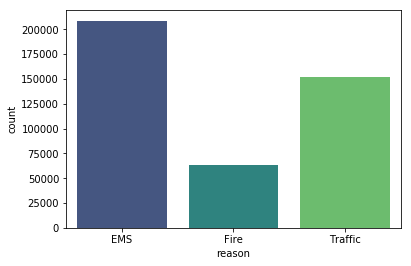

In [13]:
sns.countplot(x='reason',data=data,palette='viridis')

Type Conversion to datetime

In [15]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
time = data['timeStamp'].iloc[0]
time.hour

17

In [18]:
data['hour'] = data['timeStamp'].apply(lambda time:time.hour)
data['month'] = data['timeStamp'].apply(lambda time:time.month)
data['day of week'] = data['timeStamp'].apply(lambda time:time.dayofweek)

In [19]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason  hour  month  day of week  
0      REINDEER CT & DEAD END  1    EMS    17     12            3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12            3  
2                    HAWS AVE  1   Fire    14     12            3  
3          AIRY ST & SWEDE ST  1    EMS    16     12            3  
4    CHERRYWOOD CT & DEAD END  1    EMS    16     12            3

In [20]:
dmap = {0:'mon',1:'tue',2:'wed',3:'thur',4:'fri',5:'sat',6:'sun',}
data['day of week'] = data['day of week'].map(dmap)

In [21]:
data.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason  hour  month day of week  
0      REINDEER CT & DEAD END  1    EMS    17     12        thur  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12        thur  
2                    HAWS AVE  1   Fire    14     12        thur  
3          AIRY ST & SWEDE ST  1    EMS    16     12        thur  
4    CHERRYWOOD CT & DEAD END  1    EMS    16     12        thur

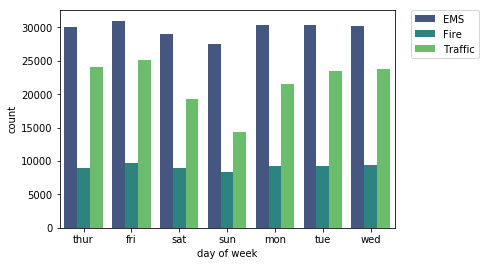

In [23]:
sns.countplot(x='day of week',data=data,hue = 'reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1) , loc = 2, borderaxespad = 0.)

In [25]:
bymonth = data.groupby('month').count()
bymonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      37824  37824  37824  33480  37824      37824  37812  37824  37824   
2      32828  32828  32828  28963  32828      32828  32817  32828  32828   
3      37666  37666  37666  33416  37666      37666  37651  37666  37666   
4      33583  33583  33583  29488  33583      33583  33575  33583  33583   
5      35644  35644  35644  31114  35644      35644  35628  35644  35644   

       reason   hour  day of week  
month                              
1       37824  37824        37824  
2       32828  32828        32828  
3       37666  37666        37666  
4       33583  33583        33583  
5       35644  35644        35644

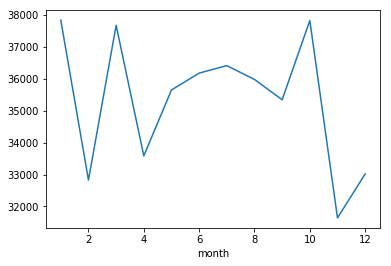

In [26]:
bymonth['lat'].plot()

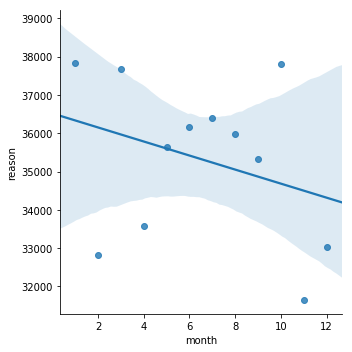

In [28]:
sns.lmplot(x='month',y='reason',data=bymonth.reset_index())

In [30]:
d = data['timeStamp'].iloc[0]
data['date'] = data['timeStamp'].apply(lambda d:d.date())
data.head(3)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   

                         addr  e reason  hour  month day of week        date  
0      REINDEER CT & DEAD END  1    EMS    17     12        thur  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12        thur  2015-12-10  
2                    HAWS AVE  1   Fire    14     12        thur  2015-12-10

In [35]:
data.groupby('date').count().head(3)


lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
date                                                                        
2015-12-10  114  114   114  100    114        114  114   114  114     114   
2015-12-11  391  391   391  332    391        391  391   391  391     391   
2015-12-12  402  402   402  334    402        402  402   402  402     402   

            hour  month  day of week  
date                                  
2015-12-10   114    114          114  
2015-12-11   391    391          391  
2015-12-12   402    402          402

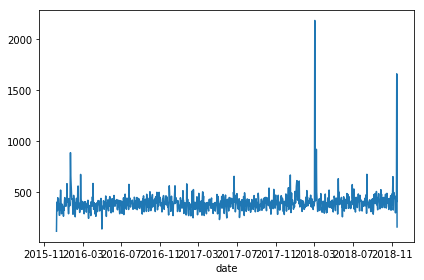

In [38]:
data.groupby('date').count()['lat'].plot()
plt.tight_layout()

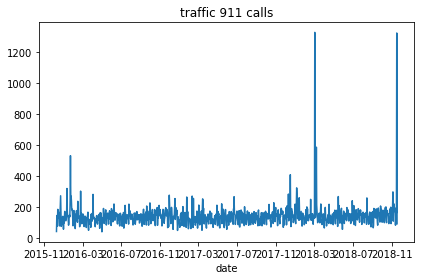

In [41]:
data[data['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('traffic 911 calls')
plt.tight_layout()

In [45]:
day = data.groupby(by=['day of week','hour']).count()['reason'].unstack()
day

hour           0     1     2     3    4     5     6     7     8     9   ...   \
day of week                                                             ...    
fri          1185  1001   930   832  821  1051  1676  2689  3185  3295  ...    
mon          1207   974   857   784  871  1124  1729  2829  3588  3685  ...    
sat          1515  1332  1206  1012  936   985  1230  1640  2211  2766  ...    
sun          1520  1331  1263  1033  954   941  1119  1568  1933  2421  ...    
thur         1115   873   920   775  784  1091  1801  2913  3468  3457  ...    
tue          1086   918   812   783  824  1075  1806  2912  3650  3563  ...    
wed          1022   952   808   795  711  1040  1763  3060  3566  3528  ...    

hour           14    15    16    17    18    19    20    21    22    23  
day of week                                                              
fri          4150  4514  4711  4489  3616  3254  2789  2445  2210  1866  
mon          3547  3975  4063  4003  3512  2821  2418  2005  1698  1283  
sat          3479  3284  3348  3274  3174  3036  2632  2432  2073  1913  
sun          2992  2828  2855  2872  2829  2679  2362  1994  1632  1470  
thur         3904  4139  4053  4412  3578  2923  2579  2230  1784  1486  
tue          3831  4087  4265  4396  3753  2960  2535  2147  1705  1350  
wed          3933  4149  4443  4487  3609  2927  2645  2236  1794  1399  

[7 rows x 24 columns]

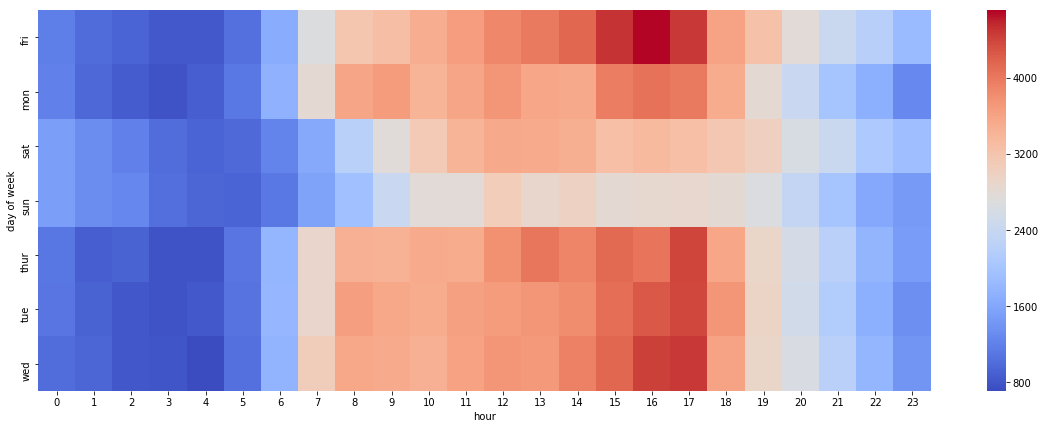

In [55]:
plt.figure(figsize=(20,7))
sns.heatmap(day,cmap='coolwarm')
